In [2]:
!pip install ConfigParser
!pip install wordcloud

In [17]:
!pip install tweepy

In [3]:
import re
import csv
import random
import pandas as pd
import os
import tweepy as tw
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import string
import nltk
import warnings
warnings.filterwarnings("ignore",category=DeprecationWarning)
%matplotlib inline

In [4]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import KFold, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.model_selection import GridSearchCV
from sklearn.externals import joblib
from nltk.corpus import stopwords
from nltk.tokenize import TweetTokenizer
from nltk.stem.wordnet import WordNetLemmatizer

C:\Users\VEDITA KAMAT\anaconda3\lib\site-packages\sklearn\externals\joblib\__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


In [5]:
import pickle
import re
from collections import Counter
from string import punctuation
import json
from wordcloud import WordCloud

In [6]:
import configparser
config = configparser.RawConfigParser()
config.read('./ML Project.txt')

print(config.sections());


['twitter']


In [7]:
accesstoken=config.get('twitter', 'accesstoken')
accesstokensecret=config.get('twitter', 'accesstokensecret')
apikey=config.get('twitter', 'apikey')
apisecretkey=config.get('twitter', 'apisecretkey')

In [8]:
auth = tw.OAuthHandler(apikey, apisecretkey)
auth.set_access_token(accesstoken, accesstokensecret)
api = tw.API(auth, wait_on_rate_limit=True)

In [24]:
search_words ="#coronavirus" or "#wfh" or "#lockdown1" or "#indiaagainstcorona"
date_since = "2020-03-23"


In [33]:
tweets = tw.Cursor(api.search,
              q=search_words,
              lang="en",
              since=date_since,
                ).items(100)

In [34]:
tweets

In [35]:
tweet_lock1 = [[ tweet.text, tweet.user.location] for tweet in tweets]
#tweet_details

In [36]:
tweet_df = pd.DataFrame(data=tweet_lock1, columns=['text', "location"])

In [37]:
tweet_df.head(20)

,text,location
0,RT @VaticanNews: #PopeFrancis expresses his ne...,in spaces
1,RT @DrDenaGrayson: “Post”?\n\nWe are *in the m...,
2,RT @htTweets: #COVID19 | Moderna to start fina...,India
3,RT @WeAreAPW: What a complete moron 🤦‍♂️ #COVI...,
4,RT @JaniceDean: I’m actually someone that does...,Florida
5,RT @juliettekayyem: This is still the first wa...,
6,RT @Trending_Taiwan: A high-tech twist for #Ta...,Taiwan
7,Coronavirus (Covid-19) : India's tally crosses...,"Noida, India"
8,RT @LotusOak2: Fauci's NIAID funded a study on...,
9,@BBCNews Two-metre distance more effective tha...,United Kingdom


In [38]:
tweet_df.location.value_counts()

                        30
United Kingdom           2
Plano, TX                2
Catalunya                2
Brussels, Belgium        2
                        ..
Hamilton, Ontario        1
India                    1
Porto Alegre, Brazil     1
Uttar Pradesh, India     1
New Delhi                1
Name: location, Length: 65, dtype: int64

In [39]:
def clean_tweets(text):
    text = re.sub("RT @[\w]*:","",text)
    text = re.sub("@[\w]*","",text)
    text = re.sub("https?://[A-Za-z0-9./]*","",text)
    text = re.sub("\n","",text)
    return text

In [40]:
tweet_df['text']=tweet_df['text'].apply(lambda x: clean_tweets(x))

In [41]:
tweet_df.head(5)

,text,location
0,#PopeFrancis expresses his nearness to the pe...,in spaces
1,“Post”?We are *in the midst* of the 1st wave ...,
2,#COVID19 | Moderna to start final testing sta...,India
3,What a complete moron 🤦‍♂️ #COVIDIOTS #COVIDー...,
4,I’m actually someone that does believe #coron...,Florida


In [42]:
tweet_df.to_csv('tweets_lockdown_1.csv')

In [43]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to C:\Users\VEDITA
[nltk_data]     KAMAT\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [44]:
tokenized_tweet=tweet_df['text'].apply(lambda x:x.split())
tokenized_tweet.head(3)

0    [#PopeFrancis, expresses, his, nearness, to, t...
1    [“Post”?We, are, *in, the, midst*, of, the, 1s...
2    [#COVID19, |, Moderna, to, start, final, testi...
Name: text, dtype: object

In [45]:
for i in range(len(tokenized_tweet)):
    tokenized_tweet[i] = ' '.join(tokenized_tweet[i])

tweet_df['text'] = tokenized_tweet

In [57]:
sid = SentimentIntensityAnalyzer()
tweet_df['sentiment']=tweet_df['text'].apply(lambda x: sid.polarity_scores(x))

In [46]:
from textblob import TextBlob
tweet_df['polarity_score']=tweet_df['text'].apply(lambda text:TextBlob(text).sentiment.polarity )

In [58]:
tweet_df.head()

,text,location,polarity_score,polarity,sentiment
0,#PopeFrancis expresses his nearness to the people of #Brazil in a telephone call to the Archbishop of Aparecida. #coronavi…,in spaces,0.000000,positive,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}"
1,“Post”?We are *in the midst* of the 1st wave of the #CoronavirusPandemic with 19 states now reporting a spike in new #…,,0.136364,positive,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}"
2,#COVID19 | Moderna to start final testing stage of #coronavirus vaccine in July …,India,0.000000,positive,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}"
3,What a complete moron 🤦‍♂️ #COVIDIOTS #COVIDー19 #Coronavirus #CoronaCrisis,,-0.350000,negative,"{'neg': 0.314, 'neu': 0.686, 'pos': 0.0, 'compound': -0.4939}"
4,I’m actually someone that does believe #coronavirus is a real thing.,Florida,0.100000,positive,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}"


In [66]:
tweet_df['polarity']=tweet_df['polarity_score'].apply(lambda x:'positive' if x>0 else('negative' if x<0 else 'neutral'))

In [67]:
tweet_df['label']=tweet_df['polarity'].apply(lambda x:1 if x=="positive" else(0 if x=="negative" else -1))

In [68]:

tweet_df.head(20)

,text,location,polarity_score,polarity,sentiment,label
0,#PopeFrancis expresses his nearness to the people of #Brazil in a telephone call to the Archbishop of Aparecida. #coronavi…,in spaces,0.000000,neutral,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}",-1
1,“Post”?We are *in the midst* of the 1st wave of the #CoronavirusPandemic with 19 states now reporting a spike in new #…,,0.136364,positive,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}",1
2,#COVID19 | Moderna to start final testing stage of #coronavirus vaccine in July …,India,0.000000,neutral,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}",-1
3,What a complete moron 🤦‍♂️ #COVIDIOTS #COVIDー19 #Coronavirus #CoronaCrisis,,-0.350000,negative,"{'neg': 0.314, 'neu': 0.686, 'pos': 0.0, 'compound': -0.4939}",0
4,I’m actually someone that does believe #coronavirus is a real thing.,Florida,0.100000,positive,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}",1
5,This is still the first wave. We are still in the first wave. Others can debate whether we should accept 1000 deaths…,,0.250000,positive,"{'neg': 0.0, 'neu': 0.89, 'pos': 0.11, 'compound': 0.3818}",1
6,A high-tech twist for #Taiwan's new life post #Coronavirus! A shuttle bus with 5G mobile internet is being tested betw…,Taiwan,0.170455,positive,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}",1
7,"Coronavirus (Covid-19) : India's tally crosses 2.85 lakh, death toll at 8,102. Over 7 billion infected worldwide. A…","Noida, India",0.000000,neutral,"{'neg': 0.336, 'neu': 0.664, 'pos': 0.0, 'compound': -0.7964}",-1
8,"Fauci's NIAID funded a study on Bat #Coronavirus, which was a project that included scientists at the #Wuhan Institute of Vi…",,0.000000,neutral,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}",-1
9,Two-metre distance more effective than one at curbing Covid-19 spread – study.#coronavirus disease 2019…,United Kingdom,0.550000,positive,"{'neg': 0.0, 'neu': 0.78, 'pos': 0.22, 'compound': 0.5256}",1


In [71]:
positives = tweet_df['label'][tweet_df.label == 1]
negatives = tweet_df['label'][tweet_df.label == 0]

print('number of positve tagged sentences is:' +str(len(positives)))
print('number of negative tagged sentences is:' +str(len(negatives)))

number of positve tagged sentences is:43
number of negative tagged sentences is:9


In [148]:
!pip install plotly

  Using cached plotly-4.8.1-py2.py3-none-any.whl (11.5 MB)


In [72]:
tweet_df.groupby('label').describe()

polarity_score                                                           \
               count      mean       std       min       25%    50%       75%   
label                                                                           
-1              48.0  0.000000  0.000000  0.000000  0.000000  0.000  0.000000   
 0               9.0 -0.285185  0.320367 -1.000000 -0.350000 -0.125 -0.125000   
 1              43.0  0.246409  0.149259  0.068182  0.107803  0.250  0.355556   

                 
            max  
label            
-1     0.000000  
 0    -0.033333  
 1     0.550000

In [73]:
def hashtag_extract(x):
    hashtags = []
    # Loop over the words in the tweet
    for i in x:
        ht = re.findall(r"#(\w+)", i)
        hashtags.append(ht)

    return hashtags

In [82]:
HT_regular = hashtag_extract(tweet_df['text'][tweet_df['label'] == 1])

# extracting hashtags from racist/sexist tweets
HT_negative = hashtag_extract(tweet_df['text'][tweet_df['label'] == 0])

# unnesting list
HT_regular = sum(HT_regular,[])
HT_negative = sum(HT_negative,[])

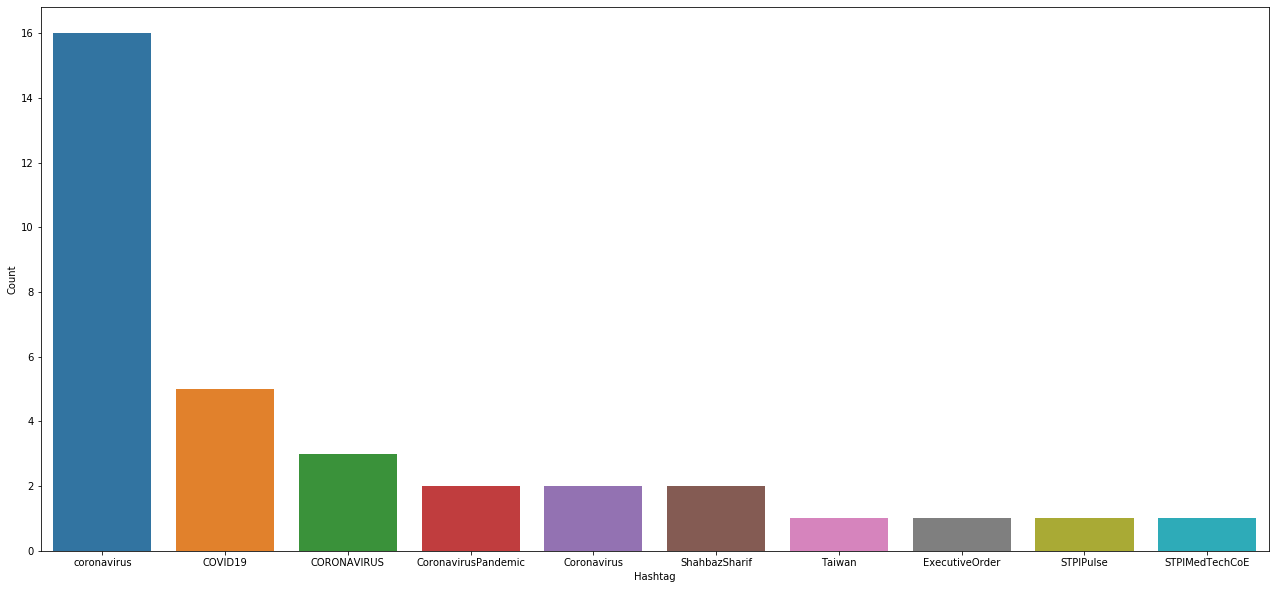

In [83]:
#positive hashtags
a = nltk.FreqDist(HT_regular)
d = pd.DataFrame({'Hashtag': list(a.keys()),
                  'Count': list(a.values())})
# selecting top 10 most frequent hashtags     
d = d.nlargest(columns="Count", n = 10) 
plt.figure(figsize=(22,10))
ax = sns.barplot(data=d, x= "Hashtag", y = "Count")
ax.set(ylabel = 'Count')
plt.show()

C:\Users\VEDITA KAMAT\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 12540 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\VEDITA KAMAT\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 12540 missing from current font.
  font.set_text(s, 0, flags=flags)


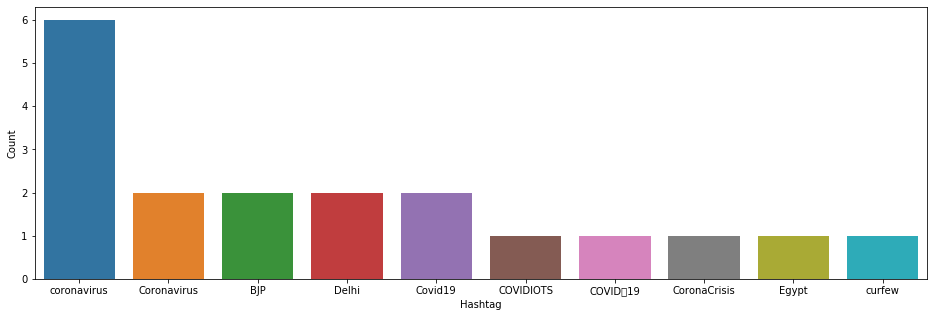

In [84]:
#negative hastags
b = nltk.FreqDist(HT_negative)
e = pd.DataFrame({'Hashtag': list(b.keys()), 'Count': list(b.values())})
# selecting top 10 most frequent hashtags
e = e.nlargest(columns="Count", n = 10)   
plt.figure(figsize=(16,5))
ax = sns.barplot(data=e, x= "Hashtag", y = "Count")
ax.set(ylabel = 'Count')
plt.show()

In [85]:
def word_count(sentence):
    return len(sentence.split())
    


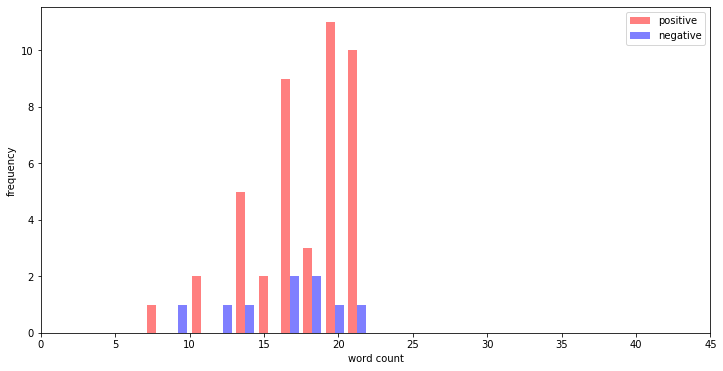

In [86]:
tweet_df['word count'] = tweet_df['text'].apply(word_count)

x = tweet_df['word count'][tweet_df.label == 1]
y = tweet_df['word count'][tweet_df.label == 0]
plt.figure(figsize=(12,6))
plt.xlim(0,45)
plt.xlabel('word count')
plt.ylabel('frequency')
g = plt.hist([x, y], color=['r','b'], alpha=0.5, label=['positive','negative'])
plt.legend(loc='upper right')

sentences fall between 5 to 25 words.
A large proportion is positive. 

In [87]:
all_words = []
for line in list(tweet_df['text']):
    words = line.split()
    for word in words:
        all_words.append(word.lower())
    
    
Counter(all_words).most_common(10)

[('the', 96),
 ('of', 43),
 ('#coronavirus', 40),
 ('in', 33),
 ('to', 32),
 ('a', 30),
 ('is', 29),
 ('and', 23),
 ('we', 15),
 ('for', 15)]

#coronavirus is a popular tweet.

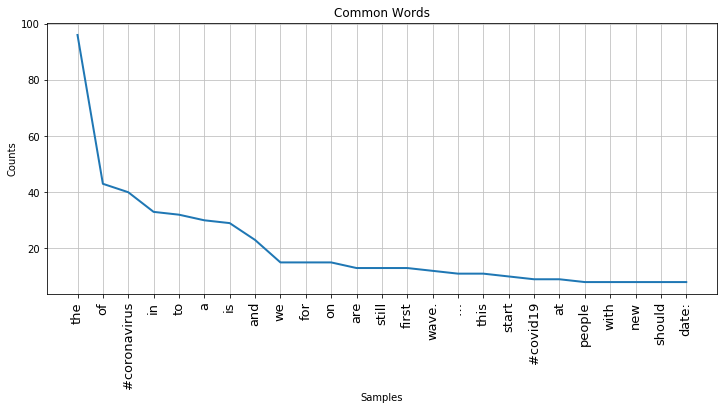

Text(0.5, 1.0, 'log-log plot of words frequency')

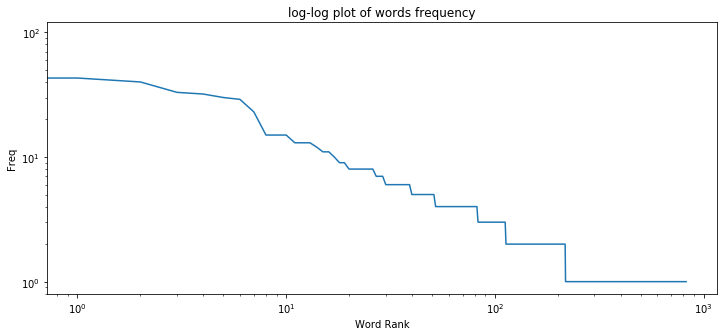

In [89]:
plt.figure(figsize=(12,5))
plt.title('Common Words')
plt.xticks(fontsize=13, rotation=90)
fd = nltk.FreqDist(all_words)
fd.plot(25,cumulative=False)

# log-log plot
word_counts = sorted(Counter(all_words).values(), reverse=True)
plt.figure(figsize=(12,5))
plt.loglog(word_counts, linestyle='-', linewidth=1.5)
plt.ylabel("Freq")
plt.xlabel("Word Rank")
plt.title('log-log plot of words frequency')

In [91]:
stop_words = stopwords.words('english') # Show some stop words
' , '.join(stop_words)[:200], len(stop_words)

("i , me , my , myself , we , our , ours , ourselves , you , you're , you've , you'll , you'd , your , yours , yourself , yourselves , he , him , his , himself , she , she's , her , hers , herself , it ",
 179)

In [93]:
def text_process(raw_text):
    """
    Takes in a string of text, then performs the following:
    1. Remove all punctuation
    2. Remove all stopwords
    3. Returns a list of the cleaned text
    """
    # Check characters to see if they are in punctuation
    nopunc = [char for char in list(raw_text) if char not in string.punctuation]

    # Join the characters again to form the string.
    nopunc = ''.join(nopunc)
    
    # Now just remove any stopwords
    return [word for word in nopunc.lower().split() if word.lower() not in stopwords.words('english')]


def remove_words(word_list):
    remove = ['corona','virus','...','“','”','’','…','ryan’']
    return [w for w in word_list if w not in remove]

In [94]:
tweet_df = tweet_df.copy()
tweet_df['tokens'] = tweet_df['text'].apply(text_process) # tokenize style 1
tweet_df['no_stoppers'] = tweet_df['tokens'].apply(remove_words) #tokenize style 2
tweet_df.head()

,text,location,polarity_score,polarity,sentiment,label,word count,tokens,no_stoppers
0,#PopeFrancis expresses his nearness to the people of #Brazil in a telephone call to the Archbishop of Aparecida. #coronavi…,in spaces,0.000000,neutral,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}",-1,19,"[popefrancis, expresses, nearness, people, brazil, telephone, call, archbishop, aparecida, coronavi…]","[popefrancis, expresses, nearness, people, brazil, telephone, call, archbishop, aparecida, coronavi…]"
1,“Post”?We are *in the midst* of the 1st wave of the #CoronavirusPandemic with 19 states now reporting a spike in new #…,,0.136364,positive,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}",1,22,"[“post”we, midst, 1st, wave, coronaviruspandemic, 19, states, reporting, spike, new, …]","[“post”we, midst, 1st, wave, coronaviruspandemic, 19, states, reporting, spike, new]"
2,#COVID19 | Moderna to start final testing stage of #coronavirus vaccine in July …,India,0.000000,neutral,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}",-1,14,"[covid19, moderna, start, final, testing, stage, coronavirus, vaccine, july, …]","[covid19, moderna, start, final, testing, stage, coronavirus, vaccine, july]"
3,What a complete moron 🤦‍♂️ #COVIDIOTS #COVIDー19 #Coronavirus #CoronaCrisis,,-0.350000,negative,"{'neg': 0.314, 'neu': 0.686, 'pos': 0.0, 'compound': -0.4939}",0,9,"[complete, moron, 🤦‍♂️, covidiots, covidー19, coronavirus, coronacrisis]","[complete, moron, 🤦‍♂️, covidiots, covidー19, coronavirus, coronacrisis]"
4,I’m actually someone that does believe #coronavirus is a real thing.,Florida,0.100000,positive,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}",1,11,"[i’m, actually, someone, believe, coronavirus, real, thing]","[i’m, actually, someone, believe, coronavirus, real, thing]"


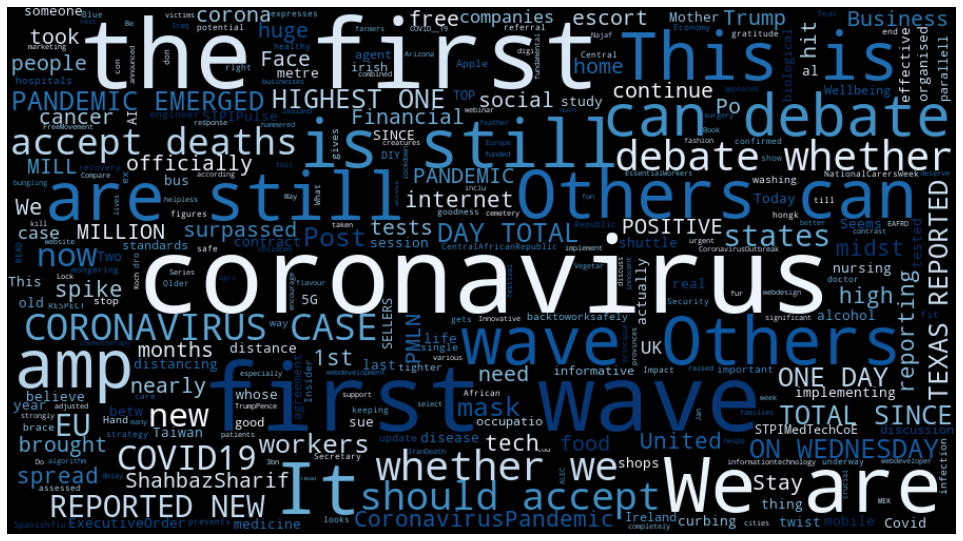

In [143]:
#positive words
all_words = []
for line in (tweet_df['no_stoppers'][tweet_df['label'] == 1]): # try 'tokens'
    all_words.extend(line)
    
wordfreq = Counter(all_words)
wordcloud = WordCloud(width=900,
                      height=500,
                      max_words=500,
                      max_font_size=100,
                      relative_scaling=0.5,
                      colormap='Blues',
                      normalize_plurals=True).generate(pos_words)
plt.figure(figsize=(17, 14))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

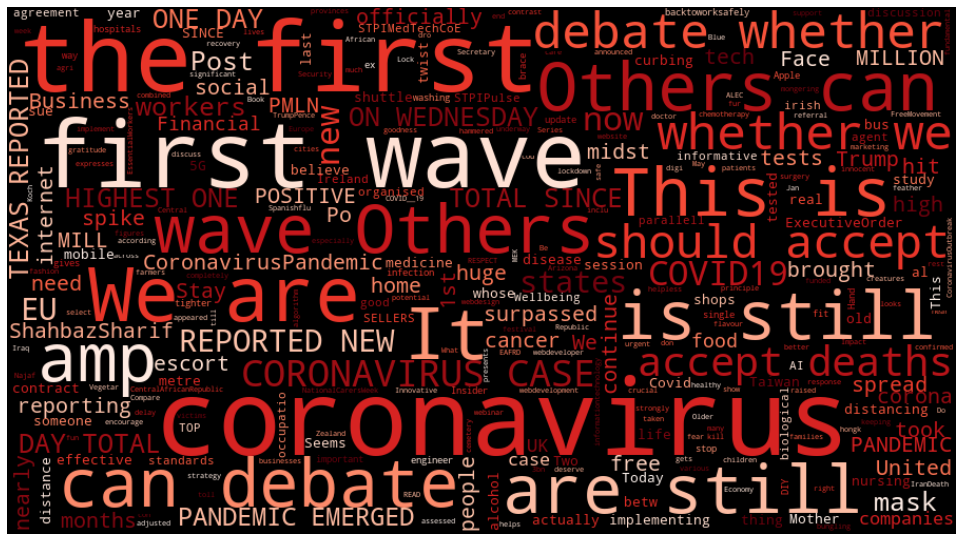

In [144]:
#negative words
all_words = []
for line in (tweet_df['text'][tweet_df['no_stoppers'] == 0]): # try 'tokens'
    all_words.extend(line)
    
wordfreq = Counter(all_words)
wordcloud = WordCloud(width=900,
                      height=500,
                      max_words=500,
                      max_font_size=100,
                      relative_scaling=0.5,
                      colormap='Reds',
                      normalize_plurals=True).generate(pos_words)
plt.figure(figsize=(17, 14))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

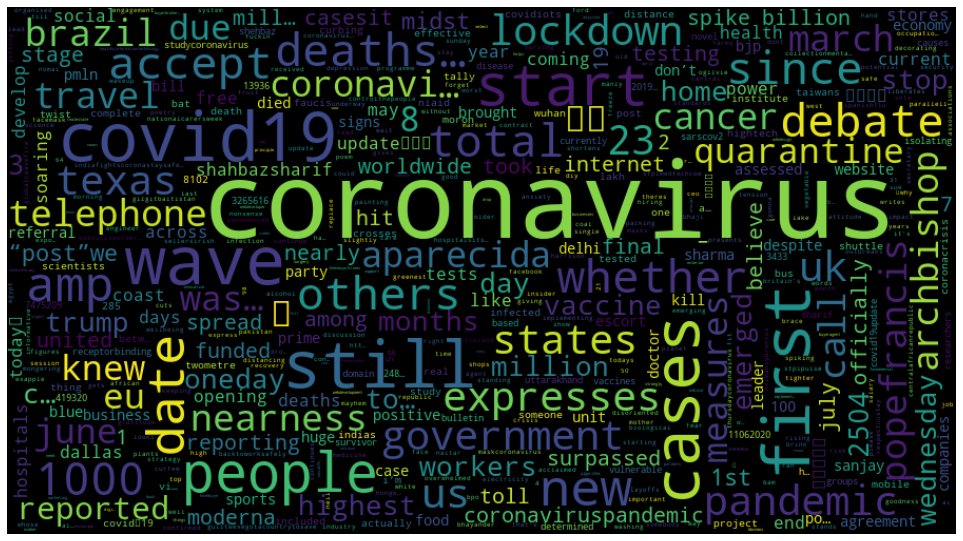

In [145]:
all_words = []
for line in tweet_df['no_stoppers']: # try 'tokens'
    all_words.extend(line)
    
# create a word frequency dictionary
wordfreq = Counter(all_words)

# draw a Word Cloud with word frequencies
wordcloud = WordCloud(width=900,
                      height=500,
                      max_words=500,
                      max_font_size=100,
                      relative_scaling=0.5,
                      
                      normalize_plurals=True).generate_from_frequencies(wordfreq)

plt.figure(figsize=(17,14))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

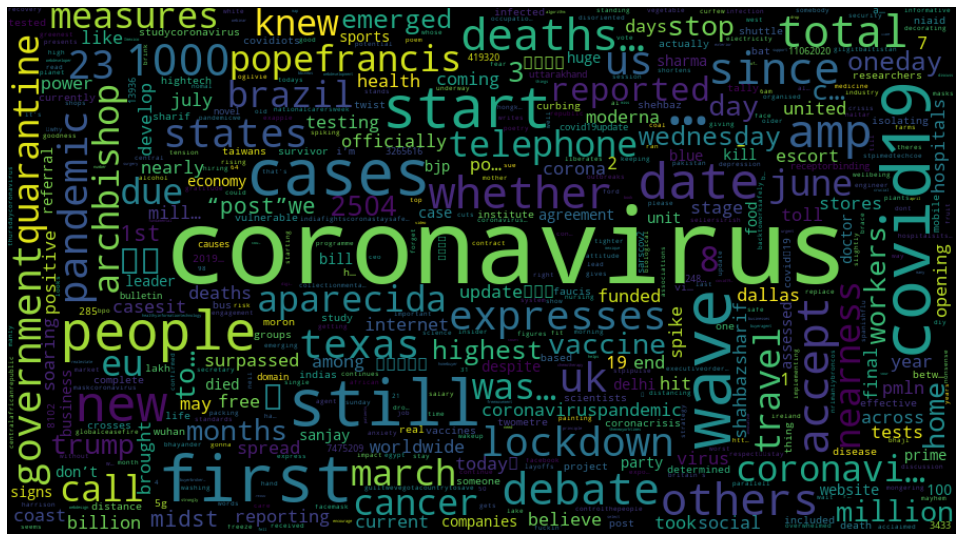

In [146]:
all_words = []
for line in tweet_df['tokens']: # try 'tokens'
    all_words.extend(line)
    
# create a word frequency dictionary
wordfreq = Counter(all_words)

# draw a Word Cloud with word frequencies
wordcloud = WordCloud(width=900,
                      height=500,
                      max_words=500,
                      max_font_size=100,
                      relative_scaling=0.5,
                      
                      normalize_plurals=True).generate_from_frequencies(wordfreq)

plt.figure(figsize=(17,14))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

FEATURE EXTRACTION

In [98]:
bow_transformer = CountVectorizer(analyzer=text_process).fit(tweet_df['text'])
# print total number of vocab words
print(len(bow_transformer.vocabulary_))

702


In [100]:
sample_tweet = tweet_df['text'][4]
print(sample_tweet)
print('\n')
# vector representation
bow_sample = bow_transformer.transform([sample_tweet])
print(bow_sample)
print('\n')

I’m actually someone that does believe #coronavirus is a real thing.


  (0, 46)	1
  (0, 84)	1
  (0, 164)	1
  (0, 362)	1
  (0, 501)	1
  (0, 560)	1
  (0, 609)	1




In [101]:
messages_bow = bow_transformer.transform(tweet_df['text'])

# check out the bag-of-words counts for the entire corpus as a large sparse matrix
print('Shape of Sparse Matrix: ', messages_bow.shape)
print('Amount of Non-Zero occurences: ', messages_bow.nnz)

Shape of Sparse Matrix:  (100, 702)
Amount of Non-Zero occurences:  1090


In [102]:
tfidf_transformer = TfidfTransformer().fit(messages_bow)
tfidf_sample = tfidf_transformer.transform(bow_sample)
print(tfidf_sample)

  (0, 609)	0.40945743609728774
  (0, 560)	0.40945743609728774
  (0, 501)	0.40945743609728774
  (0, 362)	0.40945743609728774
  (0, 164)	0.14336081099546424
  (0, 84)	0.375726919442699
  (0, 46)	0.40945743609728774


In [110]:
print(tfidf_transformer.idf_[bow_transformer.vocabulary_['trump']])
print(tfidf_transformer.idf_[bow_transformer.vocabulary_['corona']])

4.228826155721369
4.51650822817315


In [111]:
# to transform the entire bag-of-words corpus
messages_tfidf = tfidf_transformer.transform(messages_bow)
print(messages_tfidf.shape)

(100, 702)


In [ ]:
#model training

In [129]:
# Run Train Data Through Pipeline analyzer=text_process
# uncomment below to train on a larger dataset but it is very slow for a regular laptop

# X_train, X_test, y_train, y_test = train_test_split(tweet_df['text'], tweet_df['label'], test_size=0.2)
X_train, X_test, y_train, y_test = train_test_split(tweet_df['text'][:50], tweet_df['label'][:50], test_size=0.15)


# create pipeline
pipeline = Pipeline([
    ('bow', CountVectorizer(strip_accents='ascii',
                            stop_words='english',
                            lowercase=True)),  # strings to token integer counts
    ('tfidf', TfidfTransformer()),  # integer counts to weighted TF-IDF scores
    ('classifier', MultinomialNB()),  # train on TF-IDF vectors w/ Naive Bayes classifier
])

# this is where we define the values for GridSearchCV to iterate over
parameters = {'bow__ngram_range': [(1, 1), (1, 2)],
              'tfidf__use_idf': (True, False),
              'classifier__alpha': (1e-2, 1e-3),
             }

# do 10-fold cross validation for each of the 6 possible combinations of the above params
grid = GridSearchCV(pipeline, cv=10, param_grid=parameters, verbose=1)
grid.fit(X_train,y_train)

# summarize results
print("\nBest Model: %f using %s" % (grid.best_score_, grid.best_params_))
print('\n')
means = grid.cv_results_['mean_test_score']
stds = grid.cv_results_['std_test_score']
params = grid.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("Mean: %f Stdev:(%f) with: %r" % (mean, stdev, param))

Fitting 10 folds for each of 8 candidates, totalling 80 fits


C:\Users\VEDITA KAMAT\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:667: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.



Best Model: 0.725000 using {'bow__ngram_range': (1, 1), 'classifier__alpha': 0.01, 'tfidf__use_idf': False}


Mean: 0.700000 Stdev:(0.222486) with: {'bow__ngram_range': (1, 1), 'classifier__alpha': 0.01, 'tfidf__use_idf': True}
Mean: 0.725000 Stdev:(0.212426) with: {'bow__ngram_range': (1, 1), 'classifier__alpha': 0.01, 'tfidf__use_idf': False}
Mean: 0.700000 Stdev:(0.222486) with: {'bow__ngram_range': (1, 1), 'classifier__alpha': 0.001, 'tfidf__use_idf': True}
Mean: 0.725000 Stdev:(0.212426) with: {'bow__ngram_range': (1, 1), 'classifier__alpha': 0.001, 'tfidf__use_idf': False}
Mean: 0.675000 Stdev:(0.255196) with: {'bow__ngram_range': (1, 2), 'classifier__alpha': 0.01, 'tfidf__use_idf': True}
Mean: 0.700000 Stdev:(0.222486) with: {'bow__ngram_range': (1, 2), 'classifier__alpha': 0.01, 'tfidf__use_idf': False}
Mean: 0.675000 Stdev:(0.255196) with: {'bow__ngram_range': (1, 2), 'classifier__alpha': 0.001, 'tfidf__use_idf': True}
Mean: 0.700000 Stdev:(0.222486) with: {'bow__ngram_range'

[Parallel(n_jobs=1)]: Done  80 out of  80 | elapsed:    1.8s finished


In [123]:
joblib.dump(grid, "twitter_sentiment.pkl")

['twitter_sentiment.pkl']

In [124]:
model_NB = joblib.load("twitter_sentiment.pkl" )

# get predictions from best model above
y_preds = model_NB.predict(X_test)

print('accuracy score: ',accuracy_score(y_test, y_preds))
print('\n')
print('confusion matrix: \n',confusion_matrix(y_test,y_preds))
print('\n')
print(classification_report(y_test, y_preds))

accuracy score:  0.75


confusion matrix: 
 [[3 2]
 [0 3]]


              precision    recall  f1-score   support

          -1       1.00      0.60      0.75         5
           1       0.60      1.00      0.75         3

    accuracy                           0.75         8
   macro avg       0.80      0.80      0.75         8
weighted avg       0.85      0.75      0.75         8



In [130]:
y_preds

array([-1,  1,  1,  1, -1, -1,  1,  1], dtype=int64)

In [131]:
y_test

35    1
7    -1
6     1
30    1
47   -1
49    1
48    0
34    1
Name: label, dtype: int64

In [147]:
tweet_df.to_csv('tweets_lockdown_1.csv')